## Cherukuri Sai Chaitanya

### Project Description 
- The Project is about the marketing campaign conducted by the protugeuese banking institution
- The marketing campaign is based on the phone calls to the customer
- In this campaign, the customer will ge the phone calls regarding the sales of the bank term deposit 
   - one customer can have more than one contact number
### Objective

- To predict if the customer will subscribe for the bank term deposit
   


In [1]:
## Import the required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
## Import the data from csv
bank = pd.read_csv('Banking.csv')

In [3]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
## Check bank variable if data is imported or not
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [6]:
## Check if null values are present in the given data
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [7]:
## Check if any dublicate columns are present in the dataset
bank.duplicated().sum()

0

In [8]:
## Conver the target vairable from object to numeric vairable 
bank['y']= bank['y'].apply(lambda x:1 if x=='yes' else 0)

In [9]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


In [10]:
## Check the vairables in y column 
bank['y'].value_counts()

y
0    39922
1     5289
Name: count, dtype: int64

### Convert the object type data to numerical data

In [11]:
## Separating the integres and the objetct type data to two different vairables 
bank_object  =  bank.select_dtypes(include=['object']) ## Separating the object variables
bank_object.head()


,job,marital,education,default,housing,loan,contact,month,poutcome
0,management,married,tertiary,no,yes,no,unknown,may,unknown
1,technician,single,secondary,no,yes,no,unknown,may,unknown
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown
4,unknown,single,unknown,no,no,no,unknown,may,unknown


In [12]:
## Separate the numerical values
bank_num = bank.select_dtypes(include=['number'])
bank_num.head()

,age,balance,day,duration,campaign,pdays,previous,y
0,58,2143,5,261,1,-1,0,0
1,44,29,5,151,1,-1,0,0
2,33,2,5,76,1,-1,0,0
3,47,1506,5,92,1,-1,0,0
4,33,1,5,198,1,-1,0,0


In [13]:
## Converting the object fields to integr fields 
bank_dummy = pd.get_dummies(bank_object) 
bank_dummy.astype(int)

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
45207,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
45208,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
45209,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [14]:
bank_all = pd.concat([bank_num,bank_dummy.astype(int)],axis=1)
bank_all.head()

,age,balance,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,33,2,5,76,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,47,1506,5,92,1,-1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


### Exploratory Data analysis (EDA)

In [15]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


<Axes: xlabel='poutcome', ylabel='count'>

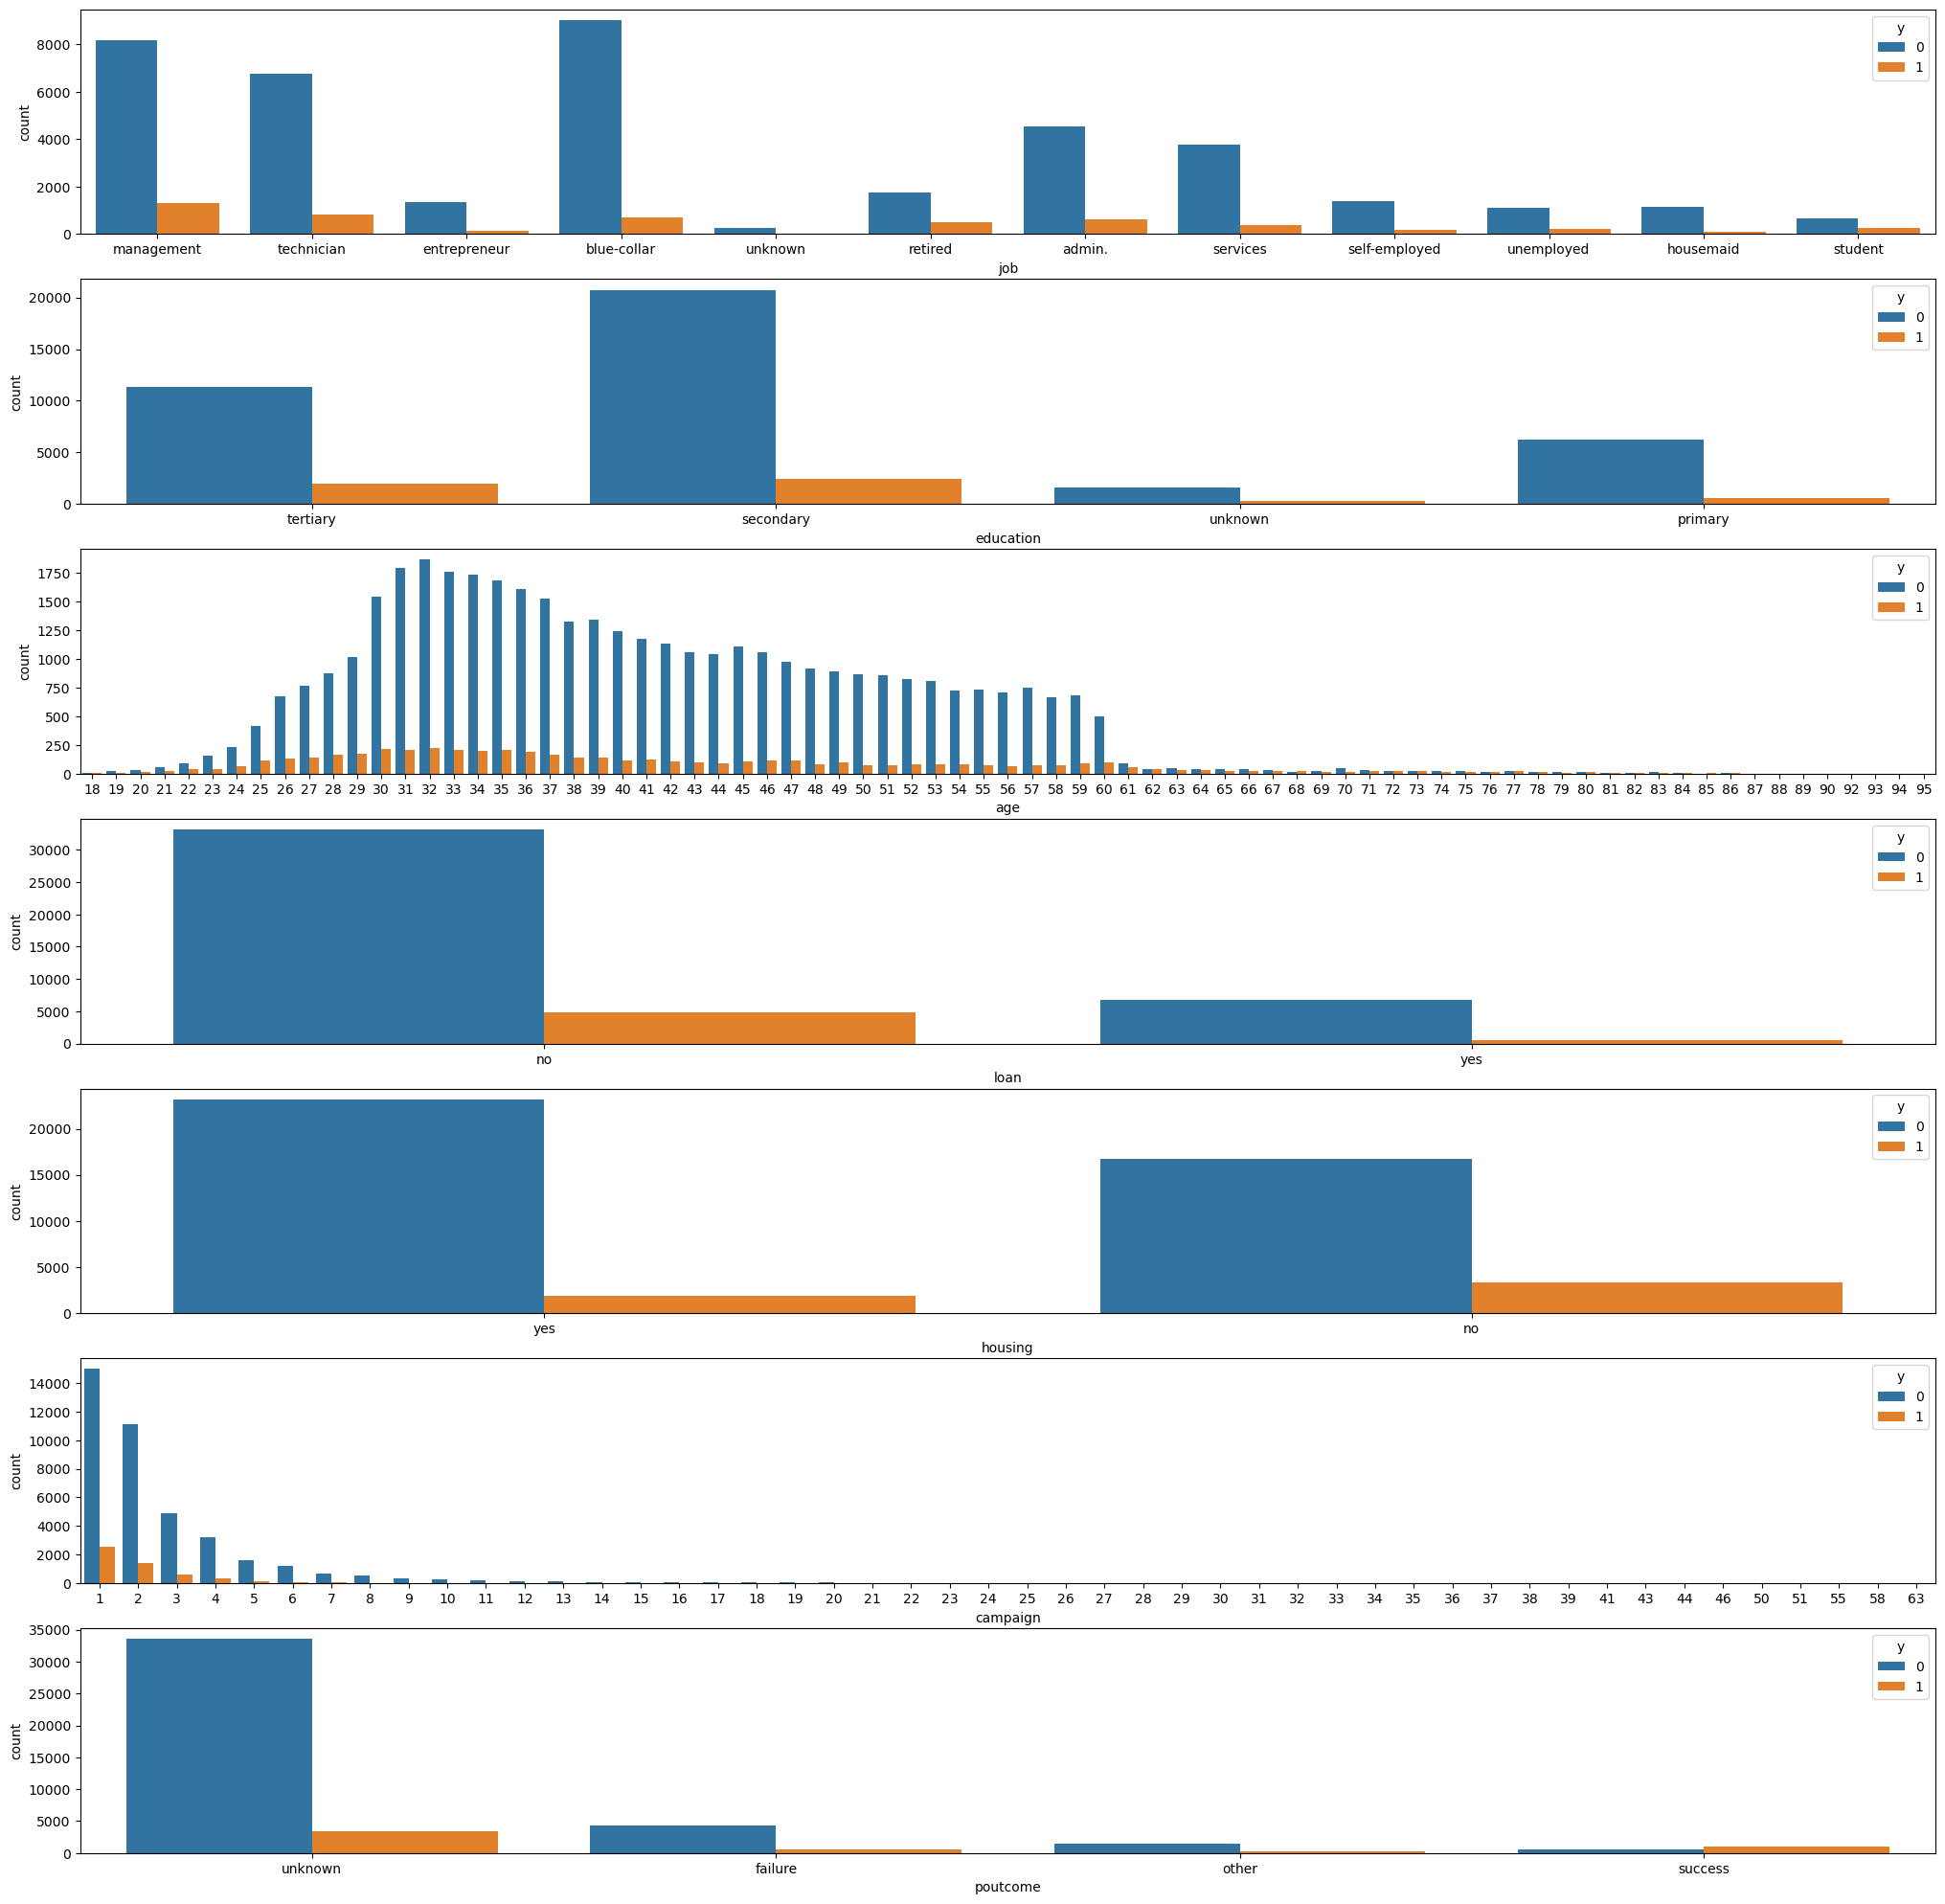

In [16]:
plt.figure(figsize=(25,25))
plt.subplot(711)
sns.countplot(data=bank,x='job',hue='y')
plt.subplot(712)
sns.countplot(data=bank,x='education',hue='y')
plt.subplot(713)
sns.countplot(data=bank,x='age',hue='y')
plt.subplot(714)
sns.countplot(data=bank,x='loan',hue='y')
plt.subplot(715)
sns.countplot(data=bank,x='housing',hue='y')
plt.subplot(716)
sns.countplot(data=bank,x='campaign',hue='y')
plt.subplot(717)
sns.countplot(data=bank,x='poutcome',hue='y')

### OutCome of the above Analysis
- Management Employees are taking the bank term deposit more than other job roles
- Age around 32 to 35 has taken the term deposit high in number 
- Number of contacts performed on the client is not effecting any impact on the term deposit subscription
- People with no personal loan and home loan are more tends to subscribe to term deposit 
- People who has taken in the previous campaign are tend to take term deposit this campaign as well 

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'balance'}>,
        <Axes: title={'center': 'day'}>],
       [<Axes: title={'center': 'duration'}>,
        <Axes: title={'center': 'campaign'}>,
        <Axes: title={'center': 'pdays'}>],
       [<Axes: title={'center': 'previous'}>,
        <Axes: title={'center': 'y'}>, <Axes: >]], dtype=object)

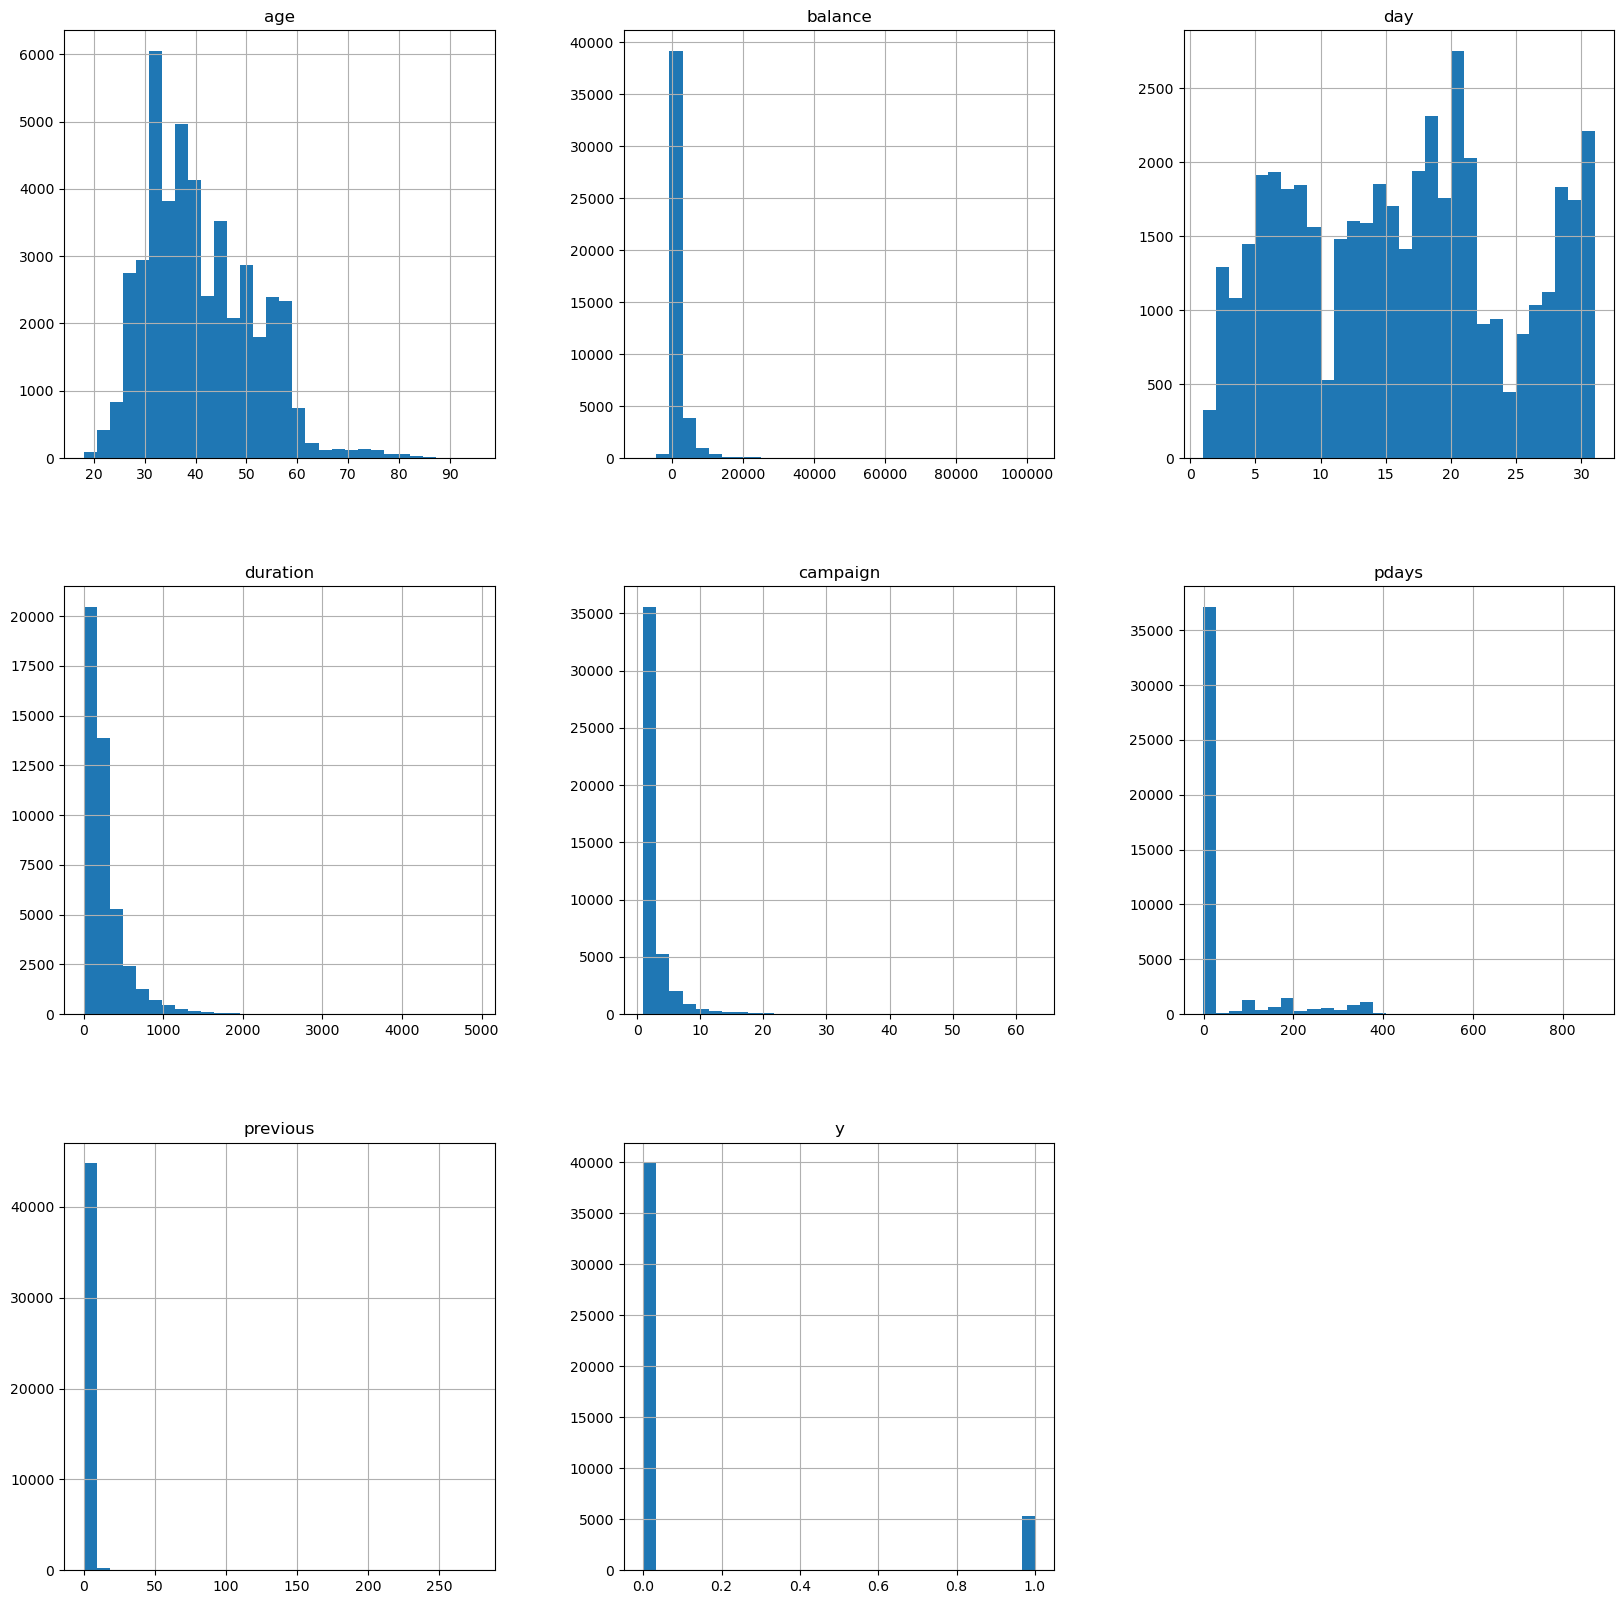

In [17]:
bank.hist(bins=30,figsize= (20,20))

Text(0.5, 1.0, '')

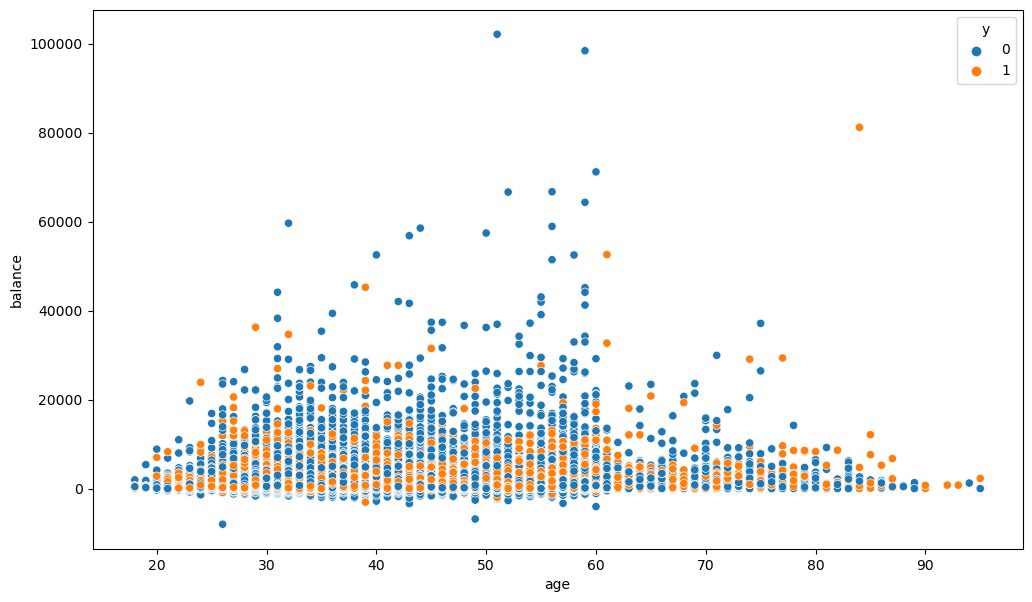

In [18]:
plt.figure(figsize=(12,7))
sns.scatterplot(x='age',y='balance',hue='y',data=bank)
plt.title('')

- Balance is not impacting the term deposit subscription

In [19]:
### Lets find out the correlation
corr = bank.corr(numeric_only=True)
corr

,age,balance,day,duration,campaign,pdays,previous,y
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288,0.025155
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674,0.052838
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710,-0.028348
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203,0.394521
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855,-0.073172
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820,0.103621
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000,0.093236
y,0.025155,0.052838,-0.028348,0.394521,-0.073172,0.103621,0.093236,1.000000


<Axes: >

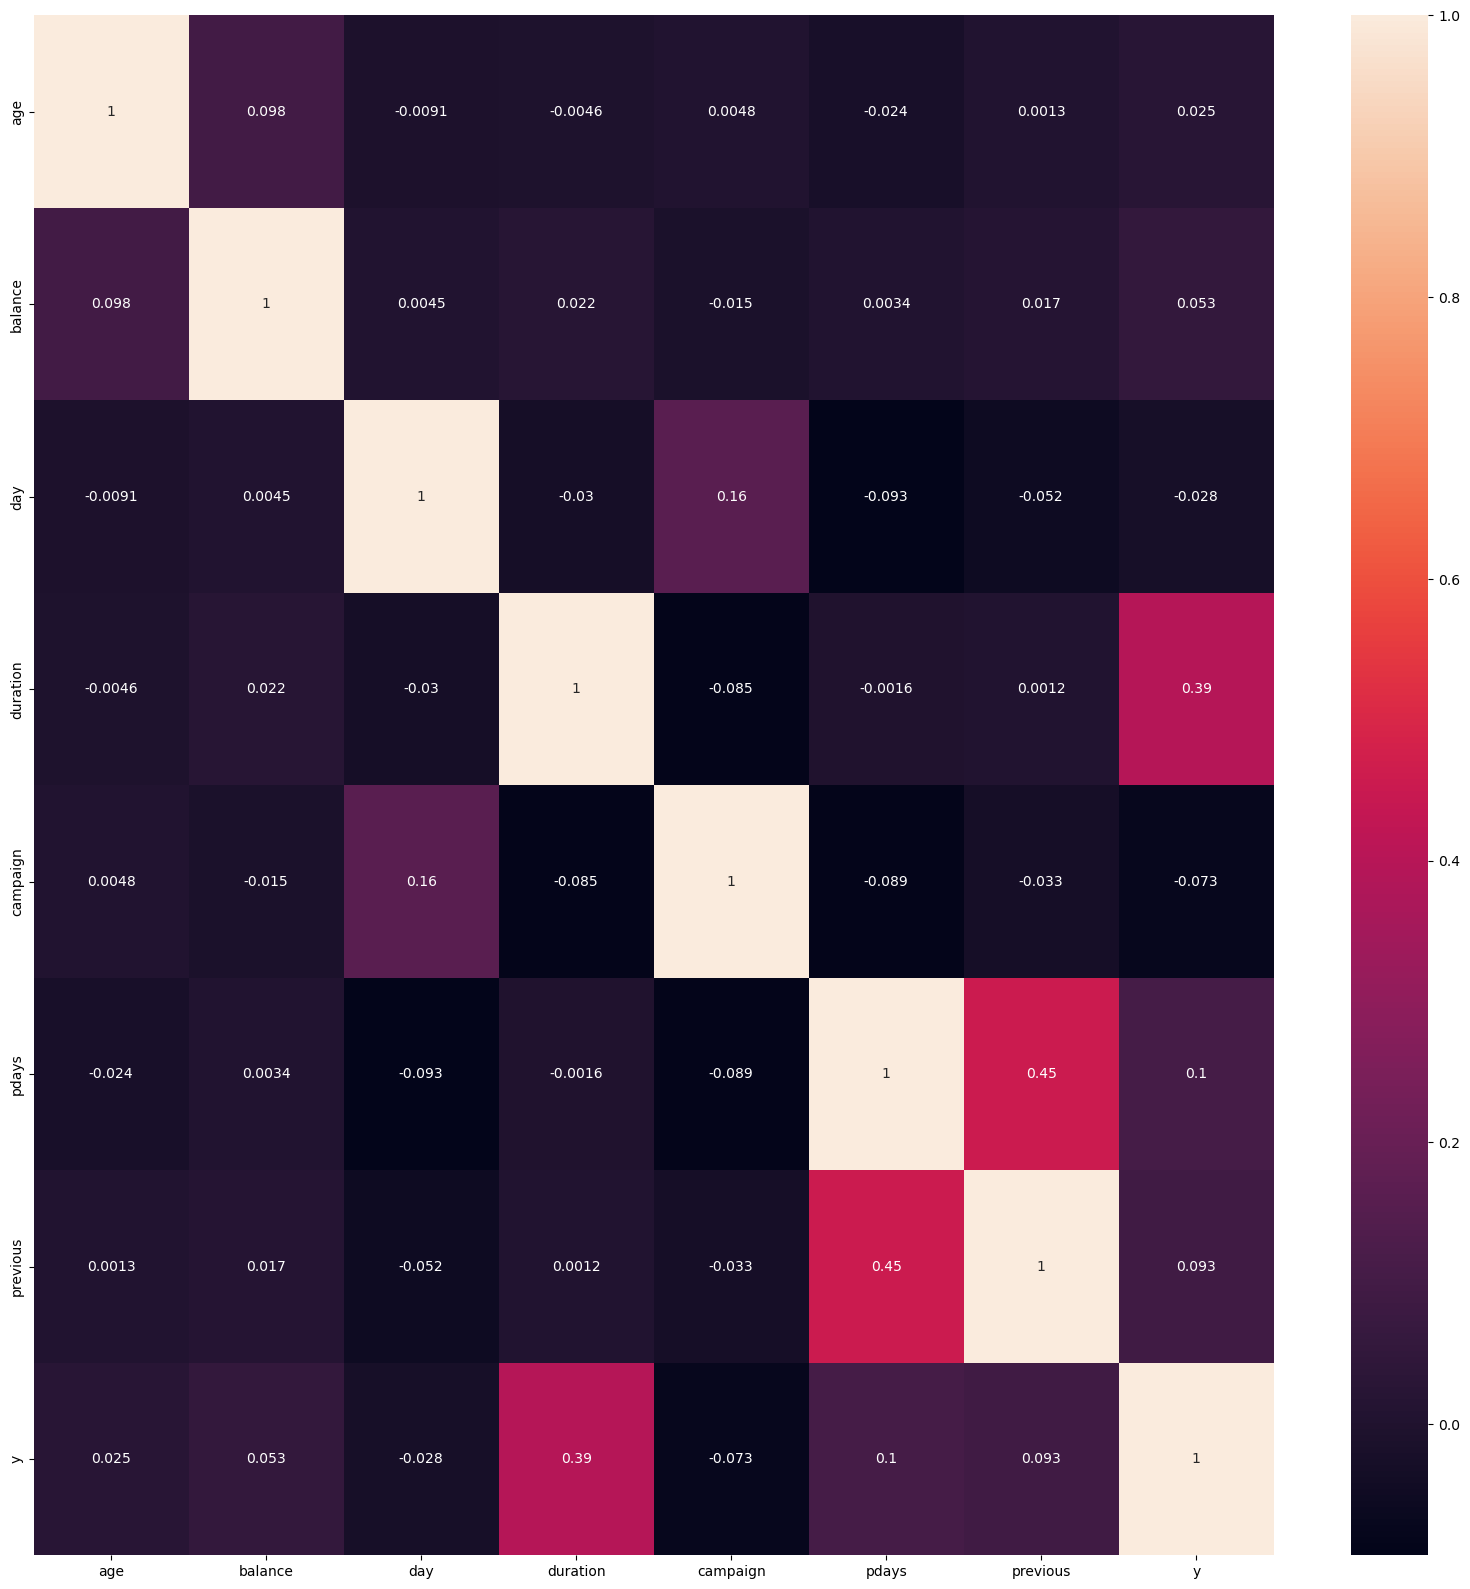

In [20]:
## Create heatmap to understand the correlations
plt.figure(figsize=(20,20))
sns.heatmap(corr,annot=True)

Text(0.5, 0, 'Term Deposit Subscription')

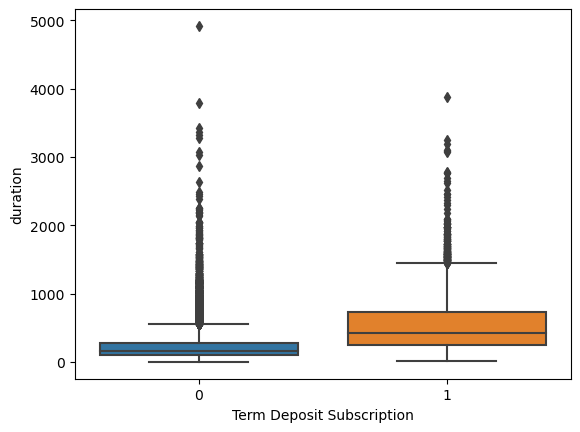

In [142]:
sns.boxplot(data=bank, x='y',y='duration')
plt.xlabel('Term Deposit Subscription')

<Axes: xlabel='y', ylabel='duration'>

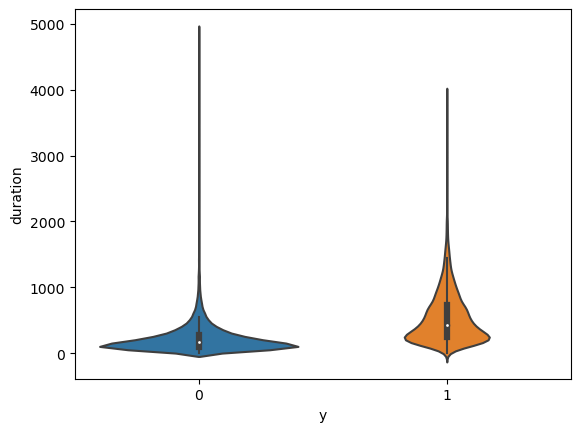

In [22]:
sns.violinplot(data=bank, x='y',y='duration')

### Outcome of the Heat Map
- Duration and y variables has good correlation
    - Average call duration for the customer who has taken the term deposit is high
    - from the boxplot we understand, outliers are high for the duration and y
        - Due to these outlies we can't strongly tell if the call duration is high customer will subscribe to the term deposit
- Remaining fields does not have strong correlation


C:\Users\cherukuri\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


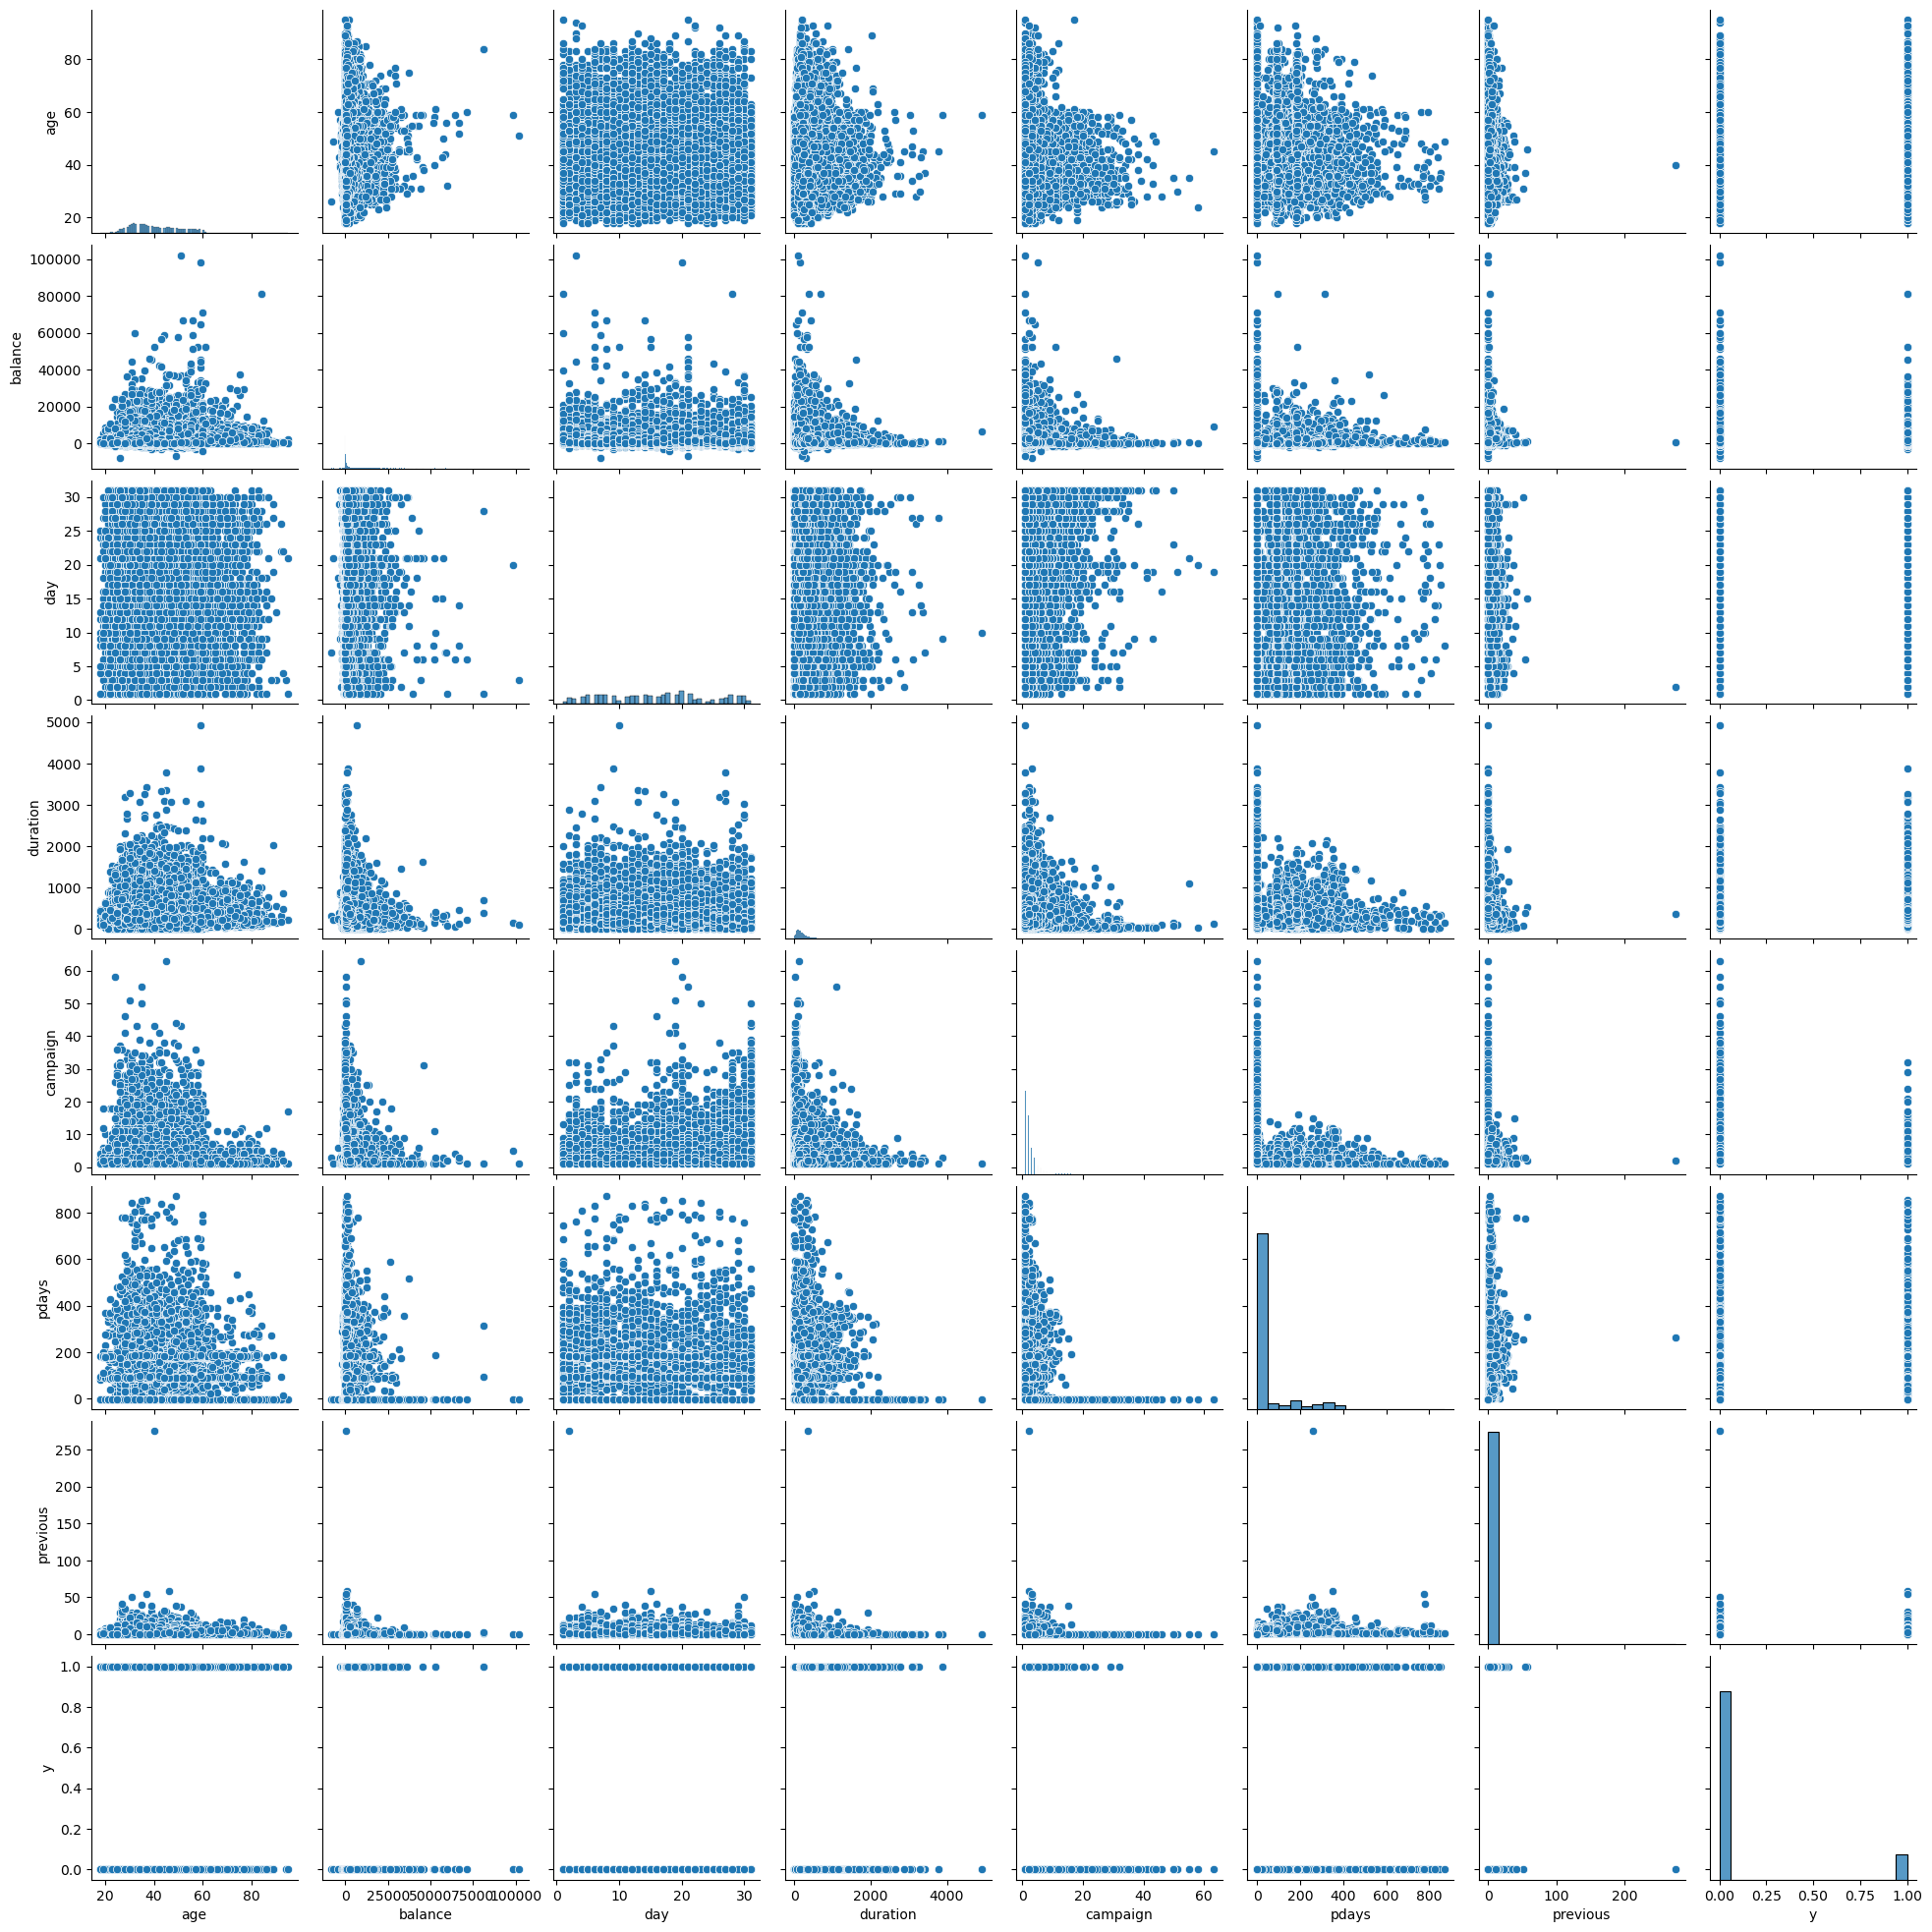

In [23]:
sns.pairplot(bank)

### Machin Learning Model Cretion
- As the independent vairable is a categorical vairable we should use classification methodes for the model creation

In [24]:
## Import the libreries required for the model building 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [25]:
### Seperate the dependent and the independet vairables 
y = bank_all['y'] ## Traget Vairable
y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int64

In [26]:
x = bank_all.drop('y',axis=1)
x

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,33,2,5,76,1,-1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
3,47,1506,5,92,1,-1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
45207,71,1729,17,456,2,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
45208,72,5715,17,1127,5,184,3,0,0,0,...,0,0,0,1,0,0,0,0,1,0
45209,57,668,17,508,4,-1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [27]:
## Scale all the columns data 
scale_model = StandardScaler()

In [28]:
bank_scale = scale_model.fit_transform(x)
bank_scale

array([[ 1.60696496,  0.25641925, -1.29847633, ..., -0.20597248,
        -0.185948  ,  0.47251925],
       [ 0.28852927, -0.43789469, -1.29847633, ..., -0.20597248,
        -0.185948  ,  0.47251925],
       [-0.74738448, -0.44676247, -1.29847633, ..., -0.20597248,
        -0.185948  ,  0.47251925],
       ...,
       [ 2.92540065,  1.42959305,  0.14341818, ..., -0.20597248,
         5.37784754, -2.11631591],
       [ 1.51279098, -0.22802402,  0.14341818, ..., -0.20597248,
        -0.185948  ,  0.47251925],
       [-0.37068857,  0.52836436,  0.14341818, ...,  4.85501757,
        -0.185948  , -2.11631591]])

In [29]:
bank_scale = pd.DataFrame(bank_scale,columns=x.columns)

In [30]:
bank_scale.head()

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,1.606965,0.256419,-1.298476,0.011016,-0.569351,-0.411453,-0.25194,-0.359369,-0.523740,-0.184415,...,-0.366006,-0.103262,1.511374,-0.310263,-0.128819,-0.113898,-0.348687,-0.205972,-0.185948,0.472519
1,0.288529,-0.437895,-1.298476,-0.416127,-0.569351,-0.411453,-0.25194,-0.359369,-0.523740,-0.184415,...,-0.366006,-0.103262,1.511374,-0.310263,-0.128819,-0.113898,-0.348687,-0.205972,-0.185948,0.472519
2,-0.747384,-0.446762,-1.298476,-0.707361,-0.569351,-0.411453,-0.25194,-0.359369,-0.523740,5.422561,...,-0.366006,-0.103262,1.511374,-0.310263,-0.128819,-0.113898,-0.348687,-0.205972,-0.185948,0.472519
3,0.571051,0.047205,-1.298476,-0.645231,-0.569351,-0.411453,-0.25194,-0.359369,1.909346,-0.184415,...,-0.366006,-0.103262,1.511374,-0.310263,-0.128819,-0.113898,-0.348687,-0.205972,-0.185948,0.472519
4,-0.747384,-0.447091,-1.298476,-0.233620,-0.569351,-0.411453,-0.25194,-0.359369,-0.523740,-0.184415,...,-0.366006,-0.103262,1.511374,-0.310263,-0.128819,-0.113898,-0.348687,-0.205972,-0.185948,0.472519


### Separate the test date and training data

In [31]:
x_train, x_test, y_train, y_test = train_test_split(bank_scale,y,test_size=0.25, random_state=42)

In [32]:
x_train.shape

(33908, 51)

In [33]:
x_test.shape

(11303, 51)

In [34]:
log_model = LogisticRegression()

In [35]:
log_model.fit(x_train,y_train)

LogisticRegression()

In [36]:
log_y_predict = log_model.predict(x_test)

In [37]:
log_y_score = accuracy_score(y_test,log_y_predict)
log_y_score

0.898876404494382

<Axes: >

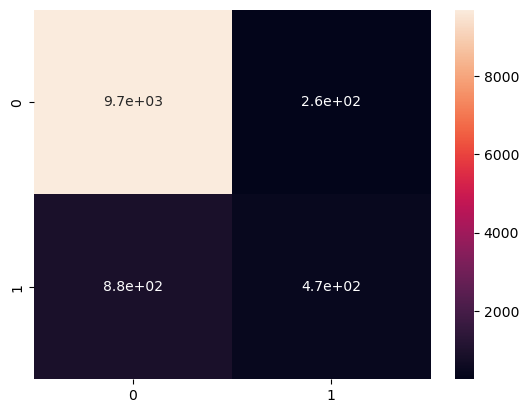

In [38]:
log_cm = confusion_matrix(y_test,log_y_predict)
sns.heatmap(data = log_cm,annot=True)

In [39]:
log_cm

array([[9692,  258],
       [ 885,  468]], dtype=int64)

In [40]:
print(classification_report(y_test,log_y_predict))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      9950
           1       0.64      0.35      0.45      1353

    accuracy                           0.90     11303
   macro avg       0.78      0.66      0.70     11303
weighted avg       0.88      0.90      0.89     11303



### Outcome of the model 
- Logistic regression model has less accuracy 90%
- score of Precision and recall for the positive cases are very low
    - model prediction for the positive cases is 35% which will impact the business where people are willing to take the term depost but model is predicting  wrong
    
need to try the other models for incresing the accuracy 


### Random Model

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
rdf_model = RandomForestClassifier(n_estimators=200)

In [43]:
rdf_model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=200)

In [44]:
rdf_y_predict = rdf_model.predict(x_test)

In [45]:
rdf_accuracy = accuracy_score(y_test,rdf_y_predict)
rdf_accuracy

0.9048925064142264

In [46]:
rdf_cm = confusion_matrix(y_test,rdf_y_predict)
rdf_cm

array([[9671,  279],
       [ 796,  557]], dtype=int64)

<Axes: >

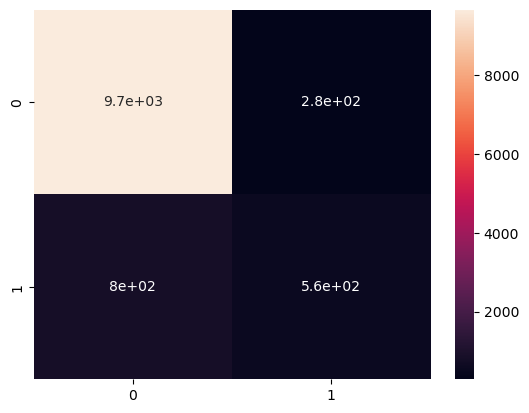

In [47]:
sns.heatmap(rdf_cm,annot=True)

In [48]:
print(classification_report(y_test,rdf_y_predict))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      9950
           1       0.67      0.41      0.51      1353

    accuracy                           0.90     11303
   macro avg       0.80      0.69      0.73     11303
weighted avg       0.89      0.90      0.89     11303



### Outcome of the model
- Accuracy has increased by 1% in Randomforest model compare to Logistic model 
- Precision and recall accuracy also has increased but this accurary still need to be imporved

### Baggin Alogaritham

In [49]:
from sklearn.ensemble import BaggingClassifier

In [50]:
bag_model = BaggingClassifier(n_estimators=50)

In [51]:
bag_model.fit(x_train,y_train)

BaggingClassifier(n_estimators=50)

In [52]:
bag_y_predict = bag_model.predict(x_test)

In [53]:
bag_accuracy = accuracy_score(y_test,bag_y_predict)
bag_accuracy

0.9039193134566045

In [54]:
bag_cr = confusion_matrix(y_test,bag_y_predict)
bag_cr

array([[9564,  386],
       [ 700,  653]], dtype=int64)

<Axes: >

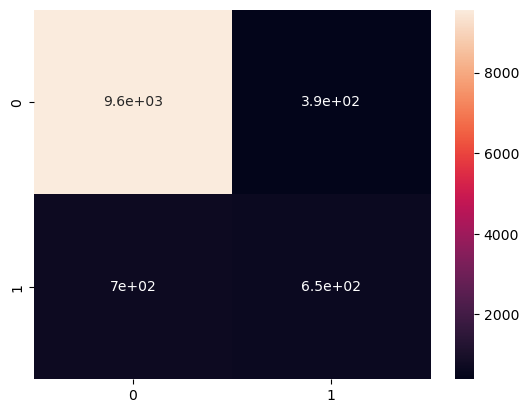

In [55]:
sns.heatmap(confusion_matrix(y_test,bag_y_predict),annot=True)

In [56]:
print(classification_report(y_test,bag_y_predict))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95      9950
           1       0.63      0.48      0.55      1353

    accuracy                           0.90     11303
   macro avg       0.78      0.72      0.75     11303
weighted avg       0.90      0.90      0.90     11303



## SVC Alogaritham

In [57]:
from sklearn.svm import SVC

In [58]:
svc_model = SVC()

In [59]:
svc_model.fit(x_train,y_train)

SVC()

In [60]:
svc_y_predict = svc_model.predict(x_test)

In [61]:
svc_accuracy = accuracy_score(y_test,svc_y_predict)
svc_accuracy

0.9032115367601522

In [62]:
svc_cm = confusion_matrix(y_test,svc_y_predict)
svc_cm

array([[9728,  222],
       [ 872,  481]], dtype=int64)

<Axes: >

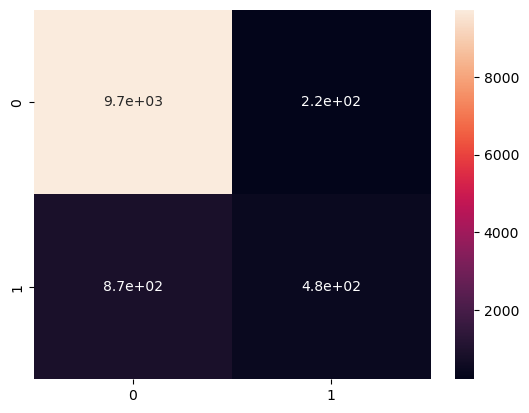

In [63]:
sns.heatmap(svc_cm,annot=True)

In [64]:
print(classification_report(y_test,svc_y_predict))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      9950
           1       0.68      0.36      0.47      1353

    accuracy                           0.90     11303
   macro avg       0.80      0.67      0.71     11303
weighted avg       0.89      0.90      0.89     11303



## KNN Classifier

In [65]:
from sklearn.neighbors import KNeighborsClassifier

In [66]:
kn_model = KNeighborsClassifier(n_neighbors=10)

In [67]:
kn_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [68]:
kn_y_predict = kn_model.predict(x_test)
kn_y_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [69]:
kn_accuracy = accuracy_score(y_test,kn_y_predict)
kn_accuracy

0.892240997965142

In [70]:
kn_cm = confusion_matrix(y_test,kn_y_predict)
kn_cm 

array([[9768,  182],
       [1036,  317]], dtype=int64)

<Axes: >

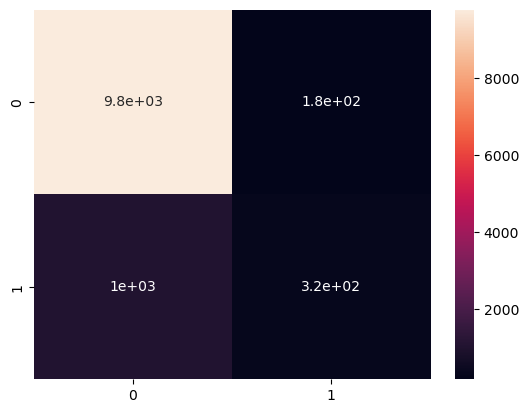

In [71]:
sns.heatmap(kn_cm,annot=True)

In [72]:
kn_clas= print(classification_report(y_test,kn_y_predict))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      9950
           1       0.64      0.23      0.34      1353

    accuracy                           0.89     11303
   macro avg       0.77      0.61      0.64     11303
weighted avg       0.87      0.89      0.87     11303



### Outcome
- All the model have the accuracy between 88 to 90 
- TO imrprove the model accuracy Few preproccessing technics need to used
    - Feature Engineering 
    - Recursive Feature Elimination (RFE)

# Feature Engineering

In [73]:
## We will use randumforest model to check the importance of the features
importance = rdf_model.feature_importances_
feature = x.columns

In [74]:
feature_impotance = pd.DataFrame({'feature':feature, 'importance':importance})
feature_impotance = feature_impotance.sort_values(by='importance',ascending=False)

In [75]:
feature_impotance

,feature,importance
3,duration,0.264789
1,balance,0.092162
0,age,0.091514
2,day,0.079547
49,poutcome_success,0.048555
4,campaign,0.038027
5,pdays,0.037743
6,previous,0.020328
35,month_apr,0.013409
28,housing_no,0.012960


### Recursive Feature Elimination (RFE)

In [76]:
from sklearn.feature_selection import RFE

In [77]:
rfe = RFE(log_model,n_features_to_select=4)

In [78]:
rfe.fit(x_train,y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=4)

In [79]:
rkn = rfe.ranking_

In [80]:
feature_impotance_rfe = pd.DataFrame({'feature':feature, 'ranking':rkn})
feature_impotance_rfe.sort_values(by='ranking',ascending=False)

,feature,ranking
26,default_no,48
27,default_yes,47
25,education_unknown,46
11,job_management,45
23,education_secondary,44
48,poutcome_other,43
17,job_unemployed,42
5,pdays,41
13,job_self-employed,40
18,job_unknown,39


In [81]:
### Drop the columns which has rank above 40 
bank_REF = bank_scale.drop(['default_no','default_yes','education_unknown','job_management','education_secondary','poutcome_other','job_unemployed','pdays','job_self-employed'],axis=1)

In [82]:
bank_REF.head()

,age,balance,day,duration,campaign,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_success,poutcome_unknown
0,1.606965,0.256419,-1.298476,0.011016,-0.569351,-0.25194,-0.359369,-0.523740,-0.184415,-0.16793,...,-0.424206,-0.366006,-0.103262,1.511374,-0.310263,-0.128819,-0.113898,-0.348687,-0.185948,0.472519
1,0.288529,-0.437895,-1.298476,-0.416127,-0.569351,-0.25194,-0.359369,-0.523740,-0.184415,-0.16793,...,-0.424206,-0.366006,-0.103262,1.511374,-0.310263,-0.128819,-0.113898,-0.348687,-0.185948,0.472519
2,-0.747384,-0.446762,-1.298476,-0.707361,-0.569351,-0.25194,-0.359369,-0.523740,5.422561,-0.16793,...,-0.424206,-0.366006,-0.103262,1.511374,-0.310263,-0.128819,-0.113898,-0.348687,-0.185948,0.472519
3,0.571051,0.047205,-1.298476,-0.645231,-0.569351,-0.25194,-0.359369,1.909346,-0.184415,-0.16793,...,-0.424206,-0.366006,-0.103262,1.511374,-0.310263,-0.128819,-0.113898,-0.348687,-0.185948,0.472519
4,-0.747384,-0.447091,-1.298476,-0.233620,-0.569351,-0.25194,-0.359369,-0.523740,-0.184415,-0.16793,...,-0.424206,-0.366006,-0.103262,1.511374,-0.310263,-0.128819,-0.113898,-0.348687,-0.185948,0.472519


In [83]:
xref_train, xref_test, yref_train, yref_test = train_test_split(bank_REF,y,test_size=0.25, random_state=42)

### Ramdom Forest

In [84]:

rdf_model.fit(xref_train,yref_train)

RandomForestClassifier(n_estimators=200)

In [85]:
rdref_y_predict = rdf_model.predict(xref_test)

In [86]:
rdref_acc = accuracy_score(yref_test,rdref_y_predict)

### Logistics Regression

In [87]:
log_model.fit(xref_train,yref_train)

LogisticRegression()

In [88]:
logref_predict = log_model.predict(xref_test)

In [89]:
logref_accuracy =  accuracy_score(yref_test,logref_predict)
logref_accuracy

0.8985225161461559

### SVC Model 

In [90]:
svc_model.fit(xref_train,yref_train)
svcref_predict = svc_model.predict(xref_test)
svcref_accuracy = accuracy_score(yref_test,svcref_predict)
svcref_accuracy

0.9038308413695479

### KNN Model 

In [91]:
kn_model.fit(xref_train,yref_train)
knref_predict = kn_model.predict(xref_test)
knref_accuracy = accuracy_score(yref_test,knref_predict)
knref_accuracy

0.8940104397062727

### Bagging Model

In [92]:
bag_model.fit(xref_train,yref_train)
bagref_predict = bag_model.predict(xref_test)
bagref_accuracy = accuracy_score(yref_test,bagref_predict)
bagref_accuracy 

0.901530567106078

# Principle Compount analysis

In [93]:
from sklearn.decomposition import PCA

In [94]:
pca = PCA(n_components=39)

In [95]:
bank_pca= pca.fit_transform(bank_scale)

In [96]:
bank_pca = pd.DataFrame(data = bank_pca)


In [97]:
bank_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,1.506682,-0.378849,-0.257195,-2.419792,-2.631241,0.305450,0.425199,-1.610934,-0.070918,0.483575,...,-0.304886,-0.118575,0.245240,-0.114593,-0.675473,-0.124980,0.129861,0.007452,-0.737991,0.942157
1,1.907079,-1.917832,1.646009,-1.061763,1.304312,-0.448172,0.252269,-0.931508,-0.147743,0.130727,...,0.464535,-0.643231,-0.141669,-0.627285,-0.358979,-0.226553,0.143355,0.064107,-0.743249,1.053328
2,2.566538,-2.113685,-0.034448,1.753883,-1.282448,0.580796,2.331546,-1.061748,-0.946656,-0.225587,...,1.420712,-0.205571,0.854497,-0.107649,-0.181138,-0.705300,0.681993,0.131005,-0.440974,0.388488
3,2.441096,-1.669215,-1.367899,-1.828439,-0.585124,-0.279890,-0.320572,0.707792,-0.525229,-0.476684,...,-1.380017,0.847261,0.129592,-2.289081,1.037685,-0.912589,0.855151,0.203006,-0.587225,-0.386905
4,1.564795,0.623454,0.469611,-2.727267,1.649174,-2.353991,1.567706,1.712379,-0.082598,-2.281155,...,4.524816,-3.215654,0.730073,1.767417,-2.702574,-0.838641,-0.744995,0.089899,-0.783735,-0.398861


In [98]:
xpca_train, xpca_test, ypca_train, ypca_test = train_test_split(bank_pca,y,test_size=0.25, random_state=42)

### Ramdomforest Model

In [99]:
rdf_model.fit(xpca_train,ypca_train)

RandomForestClassifier(n_estimators=200)

In [100]:
rdpca_predict = rdf_model.predict(xpca_test)

In [101]:
rdpca= accuracy_score(ypca_test,rdpca_predict)

### SVC Model for PCA

In [102]:
svc_model.fit(xpca_train,ypca_train)

SVC()

In [103]:
svcpca_predict = svc_model.predict(xpca_test)

In [104]:
svcpca= accuracy_score(ypca_test,svcpca_predict)

### Knn Model for PCA

In [105]:
kn_model.fit(xpca_train,ypca_train)

KNeighborsClassifier(n_neighbors=10)

In [106]:
knpca_predict = kn_model.predict(xpca_test)

In [107]:
knpca_accuracy = accuracy_score(ypca_test,knpca_predict)
knpca_accuracy

0.8925064142263116

### Logistic Regression

In [108]:
log_model.fit(xpca_train,ypca_train)

LogisticRegression()

In [109]:
logpca_predict = log_model.predict(xpca_test) 

In [110]:
logpca_accuracy = accuracy_score(ypca_test,logpca_predict)
logpca_accuracy

0.897726267362647

In [111]:
bag_model.fit(xpca_train,ypca_train)
bagpca_predict = bag_model.predict(xpca_test)
bagpca_accuracy = accuracy_score(ypca_test,bagpca_predict)
bagpca_accuracy

0.8981686277979297

## Model Tuning

In [112]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [113]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [114]:
rf = RandomForestClassifier(random_state=42)

In [115]:
rf

RandomForestClassifier(random_state=42)

In [116]:
grid_model = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

In [117]:
random_model = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=50, cv=5, random_state=42, n_jobs=-1, verbose=2)

In [118]:
random_model.fit(xpca_train,ypca_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42, verbose=2)

In [119]:
randomypca_predict= random_model.predict(xpca_test)

In [120]:
random_accuracy_pca = accuracy_score(y_test,randomypca_predict)
random_accuracy_pca

0.901530567106078

In [121]:
print(classification_report(y_test,randomypca_predict))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      9950
           1       0.66      0.37      0.47      1353

    accuracy                           0.90     11303
   macro avg       0.79      0.67      0.71     11303
weighted avg       0.89      0.90      0.89     11303



### Outcomes
- Randomizedsearchcv method accuracy is similer to the other model

As the dataset is a imbalance dataset the accuracy is not more than 90%
- TO improve the accuracy lets used few databalacing techniques 
    - Balance Randome Forest Classifier
    - SMOTE (Synthetic Minority Over-sampling Technique)

In [122]:
from imblearn.ensemble import BalancedRandomForestClassifier

In [123]:
brfc = BalancedRandomForestClassifier()

In [124]:
brfc.fit(x_train,y_train)

C:\Users\cherukuri\AppData\Local\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\cherukuri\AppData\Local\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\cherukuri\AppData\Local\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning 

BalancedRandomForestClassifier()

In [125]:
brfc_predict = brfc.predict(x_test)
brefc_accuracy = accuracy_score(y_test,brfc_predict)
brefc_accuracy

0.8341148367689993

In [134]:
print(classification_report(y_test,brfc_predict))

              precision    recall  f1-score   support

           0       0.98      0.83      0.90      9950
           1       0.41      0.89      0.56      1353

    accuracy                           0.83     11303
   macro avg       0.70      0.86      0.73     11303
weighted avg       0.91      0.83      0.86     11303



In [126]:
from imblearn.over_sampling import SMOTE

In [127]:
smote = SMOTE()

In [128]:
X_resampled, y_resampled = smote.fit_resample(x_train,y_train)

In [129]:
rdf_model.fit(X_resampled, y_resampled)

RandomForestClassifier(n_estimators=200)

In [130]:
smot_predict = rdf_model.predict(x_test)
smote_accuracy = accuracy_score(y_test,smot_predict)
smote_accuracy

0.893391135096877

In [133]:
print(classification_report(y_test,smot_predict))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      9950
           1       0.55      0.58      0.57      1353

    accuracy                           0.89     11303
   macro avg       0.75      0.76      0.75     11303
weighted avg       0.90      0.89      0.89     11303



In [131]:
accuracy_comparision  =  pd.DataFrame({'Model_name':['LogisticRegression','RandomForest','SVC','KNN','RandomizesearchCV','Bagging', 'Balanced RandomFOrest Classifier','SMOTE'],'Accuracy':[log_y_score,rdf_accuracy,svc_accuracy,kn_accuracy,0,bag_accuracy,brefc_accuracy,smote_accuracy],'Accuracy_REF':[logref_accuracy,rdref_acc,svcref_accuracy,knref_accuracy,0,bagref_accuracy,0,0],'Accuracy_PCA':[logpca_accuracy,rdpca,svcpca,knpca_accuracy,random_accuracy_pca,bagpca_accuracy,0,0]})
accuracy_comparision_1 = accuracy_comparision[['Accuracy','Accuracy_REF','Accuracy_PCA']]* 100
accuracy_comparision = pd.concat([accuracy_comparision['Model_name'] , accuracy_comparision_1],axis=1)

In [135]:
print(accuracy_comparision.to_string(index=False))

                      Model_name  Accuracy  Accuracy_REF  Accuracy_PCA
              LogisticRegression 89.887640     89.852252     89.772627
                    RandomForest 90.489251     90.241529     90.082279
                             SVC 90.321154     90.383084     90.356543
                             KNN 89.224100     89.401044     89.250641
               RandomizesearchCV  0.000000      0.000000     90.153057
                         Bagging 90.391931     90.153057     89.816863
Balanced RandomFOrest Classifier 83.411484      0.000000      0.000000
                           SMOTE 89.339114      0.000000      0.000000


In [140]:
accuracy_comparision.style.hide(axis= 'index')

Model_name,Accuracy,Accuracy_REF,Accuracy_PCA
LogisticRegression,89.887640,89.852252,89.772627
RandomForest,90.489251,90.241529,90.082279
SVC,90.321154,90.383084,90.356543
KNN,89.224100,89.401044,89.250641
RandomizesearchCV,0.000000,0.000000,90.153057
Bagging,90.391931,90.153057,89.816863
Balanced RandomFOrest Classifier,83.411484,0.000000,0.000000
SMOTE,89.339114,0.000000,0.000000


- By comparing all the models accuracy Randomforest accuracy for the Scaled data has the highest Accuracy Score 